https://www.youtube.com/watch?v=wlQEcEKNpyk&list=PL9mhQYIlKEhcL3_nJMYx9u-nY2TggZJ0Z&index=2

Jupyterlab 단축기
https://3months.tistory.com/392

In [2]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
data = wine.data
label = wine.target
columns = wine.feature_names

In [6]:
data = pd.DataFrame(data, columns = columns)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
data.shape

(178, 13)

In [8]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

# Clustering

## 1. k-Means Clustering

STEP1. 각 데이터 포인트 i에 대해 가장 가까운 중심점을 찾고, 그 중심점에 해당하는 클러스터를 할당한다. 가까운 중심점을 찾을때는, `유클리드 거리`를 사용합니다.

STEP2. 할당된 클러스터를 기반으로 새로운 중심점을 계산합니다. 중심점은 클러스터 내부 점들의 `산술평균(mean)` 으로 합니다.

STEP3. 각 클러스터의 할당이 바뀌지 않을때 까지 바뀝니다.

### 준비

wine 데이터는 13개의 컬럼을 가지고 있고, 하나의 행은 13개의 차원으로 이루어진 벡터인데 13차원은 표현하기 어려우므로 PCA를 통해 2차원으로 만들어서 시각화 할 수 있도록 변환하겠습니다.

그전에 각 변수들의 값의 범위가 서로 다르므로 min-max정규화를 통해 조정해주겠습니다.

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)

In [13]:
data.shape

(178, 2)

### 1) 모델 불러오기 및 정의하기

클러스터링은 비지도 학습이므로 클래스터의 수는 라벨의 수와 관계 없지만, 3개의 군집을 형성하도록 해보겠습니다.

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

## 모델 학습하기

클러스터링을 통항 중심점 찾기

In [17]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
cluster = kmeans.predict(data)

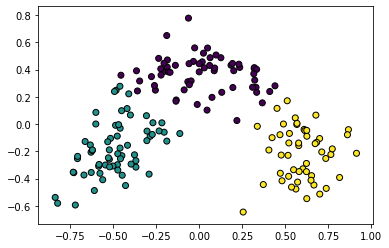

In [19]:
plt.scatter(data[:,0], data[:,1], c=cluster, linewidth=1, edgecolor='black')

# 2. Hierarchical Clustering

Hierarchical Clustering은 거리 또는 유사도를 기반으로 클러스터를 생성한다. 

STEP1. 

## 가장 좋은 클러스터를 형성하는 클러스터의 수를 찾아보자.

k-means 클러스터링과 Average Linkage 를 사용한 Hierarchical 클러스터링에서 가장 높은 점수의 클러스터 수는 무엇인지 알아보겠습니다.

## 1) k-means

In [27]:
from sklearn.metrics import silhouette_score
best_n = 1
best_score = -1

In [40]:
for n_cluster in range(2,11):
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(data)
    cluster = kmeans.predict(data)
    score = silhouette_score(data,cluster)
    
    print(f'클러스터의 수 : {n_cluster:2d}, 실루엣 점수 : {score:.2f}')
    
    if score > best_score:
        best_n = n_cluster
        best_score = score
        
print(f'가장 높은 점수를 가진 클러스터 수 : {best_n}, 실루엣점수: {best_score:.2f}')

클러스터의 수 :  2, 실루엣 점수 : 0.49
클러스터의 수 :  3, 실루엣 점수 : 0.57
클러스터의 수 :  4, 실루엣 점수 : 0.49
클러스터의 수 :  5, 실루엣 점수 : 0.46
클러스터의 수 :  6, 실루엣 점수 : 0.43
클러스터의 수 :  7, 실루엣 점수 : 0.38
클러스터의 수 :  8, 실루엣 점수 : 0.38
클러스터의 수 :  9, 실루엣 점수 : 0.39
클러스터의 수 : 10, 실루엣 점수 : 0.38
가장 높은 점수를 가진 클러스터 수 : 3, 실루엣점수: 0.57
